<a href="https://colab.research.google.com/github/GoldenEastLight/AI_ML_Project/blob/master/Warmart_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

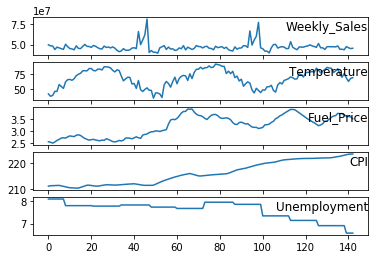

In [3]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('/content/ALL_ALL.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

Epoch 1/500
 - 2s - loss: 1.7941
Epoch 2/500
 - 0s - loss: 1.4304
Epoch 3/500
 - 0s - loss: 1.4110
Epoch 4/500
 - 0s - loss: 1.3956
Epoch 5/500
 - 0s - loss: 1.3826
Epoch 6/500
 - 0s - loss: 1.3712
Epoch 7/500
 - 0s - loss: 1.3607
Epoch 8/500
 - 0s - loss: 1.3509
Epoch 9/500
 - 0s - loss: 1.3418
Epoch 10/500
 - 0s - loss: 1.3329
Epoch 11/500
 - 0s - loss: 1.3247
Epoch 12/500
 - 0s - loss: 1.3172
Epoch 13/500
 - 0s - loss: 1.3101
Epoch 14/500
 - 0s - loss: 1.3033
Epoch 15/500
 - 0s - loss: 1.2976
Epoch 16/500
 - 0s - loss: 1.2919
Epoch 17/500
 - 0s - loss: 1.2871
Epoch 18/500
 - 0s - loss: 1.2822
Epoch 19/500
 - 0s - loss: 1.2779
Epoch 20/500
 - 0s - loss: 1.2736
Epoch 21/500
 - 0s - loss: 1.2697
Epoch 22/500
 - 0s - loss: 1.2655
Epoch 23/500
 - 0s - loss: 1.2616
Epoch 24/500
 - 0s - loss: 1.2581
Epoch 25/500
 - 0s - loss: 1.2539
Epoch 26/500
 - 0s - loss: 1.2499
Epoch 27/500
 - 0s - loss: 1.2457
Epoch 28/500
 - 0s - loss: 1.2417
Epoch 29/500
 - 0s - loss: 1.2369
Epoch 30/500
 - 0s - lo

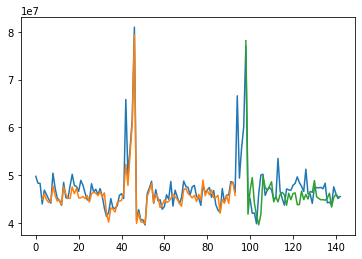

In [4]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/ALL_ALL.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 10))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1] , trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2 ,shuffle=False)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()